<a href="https://www.kaggle.com/code/raaggeesingh/autopricepro?scriptVersionId=152429902" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
df = pd.read_csv("/kaggle/input/used-cars-price-prediction/train-data.csv")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
testdf = pd.read_csv("/kaggle/input/used-cars-price-prediction/test-data.csv")
testdf.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [4]:
df = df.drop("Unnamed: 0", axis=1)
testdf = testdf.drop("Unnamed: 0", axis=1)

In [5]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
testdf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [7]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [8]:
df.shape

(6019, 13)

In [9]:
testdf.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [10]:
testdf.shape

(1234, 12)

In [11]:
df = df.dropna(how='any')
testdf = testdf.dropna(how='any')

In [12]:
df.shape

(823, 13)

In [13]:
testdf.shape

(182, 12)

In [14]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55


In [15]:
testdf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
30,Toyota Etios Cross 1.4L VD,Chennai,2014,70000,Diesel,Manual,Second,23.59 kmpl,1364 CC,67.06 bhp,5.0,9.27 Lakh
36,Skoda Rapid 1.6 MPI AT Style,Mumbai,2017,13500,Petrol,Automatic,First,14.84 kmpl,1598 CC,103.52 bhp,5.0,14.95 Lakh
39,BMW 5 Series 520d Luxury Line,Mumbai,2012,66889,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0,70.43 Lakh
43,Skoda Rapid 1.6 MPI Ambition,Jaipur,2018,4000,Petrol,Manual,First,15.41 kmpl,1598 CC,103.52 bhp,5.0,11.89 Lakh


In [16]:
df = df.drop('New_Price', axis=1)
testdf = testdf.drop('New_Price', axis=1)

In [17]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,9.95
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,15.00
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,18.55


In [18]:
testdf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
30,Toyota Etios Cross 1.4L VD,Chennai,2014,70000,Diesel,Manual,Second,23.59 kmpl,1364 CC,67.06 bhp,5.0
36,Skoda Rapid 1.6 MPI AT Style,Mumbai,2017,13500,Petrol,Automatic,First,14.84 kmpl,1598 CC,103.52 bhp,5.0
39,BMW 5 Series 520d Luxury Line,Mumbai,2012,66889,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0
43,Skoda Rapid 1.6 MPI Ambition,Jaipur,2018,4000,Petrol,Manual,First,15.41 kmpl,1598 CC,103.52 bhp,5.0


In [19]:
trainlist = df['Name']
testlist = testdf['Name']
print(f"Missing Values{set(testlist).difference(trainlist)}")

Missing Values{'Maruti Wagon R VXI AMT Opt', 'Toyota Innova Crysta Touring Sport 2.4 MT', 'Tata Tiago AMT 1.2 Revotron XTA', 'Skoda Rapid 1.6 MPI AT Style', 'Maruti Vitara Brezza ZDi AMT', 'Hyundai Xcent 1.2 CRDi SX', 'Tata Tiago 1.05 Revotorq XT Option', 'Honda BR-V i-VTEC VX MT', 'Bentley Flying Spur W12', 'Honda Jazz VX CVT', 'Fiat Linea Classic 1.3 Multijet', 'Mercedes-Benz B Class B180 Sport', 'Maruti Ertiga VXI Petrol', 'Skoda Octavia 2.0 TDI MT Style', 'Maruti Vitara Brezza ZDi Plus AMT', 'Mercedes-Benz GLA Class 220 d 4MATIC', 'Hyundai Tucson 2.0 e-VGT 4WD AT GLS', 'Mahindra Bolero SLX', 'Volkswagen Vento 1.5 TDI Highline Plus AT', 'Jaguar XF 2.0 Petrol Portfolio', 'Ford EcoSport 1.5 Petrol Ambiente', 'Toyota Etios Cross 1.2L G', 'BMW 5 Series 530i Sport Line', 'Maruti Alto LXI', 'Skoda Rapid 1.5 TDI AT Ambition', 'Volkswagen Vento 1.6 Trendline', 'Honda WRV i-DTEC VX', 'Mahindra Verito Vibe 1.5 dCi D6', 'Honda BR-V i-DTEC S MT', 'Ford Freestyle Titanium Plus Diesel', 'Mahindra

In [20]:
df['Cars'] = df['Name'].apply(lambda x: x.split(" ")[0]) + ' ' + df['Name'].apply(lambda x: x.split(" ")[1])
testdf['Cars'] = testdf['Name'].apply(lambda x: x.split(" ")[0]) + ' ' + testdf['Name'].apply(lambda x: x.split(" ")[1])

In [21]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda Jazz
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50,Toyota Innova
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,9.95,Maruti Ciaz
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,15.00,Mitsubishi Pajero
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,18.55,BMW 3


In [22]:
set(testdf['Cars']).issubset(set(df['Cars']))

False

In [23]:
trainlist = df['Cars']
testlist = testdf['Cars']
print(f"Missing Values{set(testlist).difference(trainlist)}")

Missing Values{'Mercedes-Benz B', 'Bentley Flying', 'Fiat Avventura', 'Fiat Punto'}


In [24]:
testdf.drop(testdf[testdf['Cars'].isin(['OpelCorsa 1.4Gsi', 'Hindustan Motors', 'Bentley Flying', 'Nissan 370Z', 'Toyota Land', 'Fiat Abarth', 'Isuzu MU'])].index, inplace = True)

In [25]:
testdf.shape

(181, 12)

In [26]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Cars                  object
dtype: object

In [27]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda Jazz
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50,Toyota Innova
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,9.95,Maruti Ciaz
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,15.00,Mitsubishi Pajero
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,18.55,BMW 3


In [28]:
testdf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Cars
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,Toyota Innova
30,Toyota Etios Cross 1.4L VD,Chennai,2014,70000,Diesel,Manual,Second,23.59 kmpl,1364 CC,67.06 bhp,5.0,Toyota Etios
36,Skoda Rapid 1.6 MPI AT Style,Mumbai,2017,13500,Petrol,Automatic,First,14.84 kmpl,1598 CC,103.52 bhp,5.0,Skoda Rapid
39,BMW 5 Series 520d Luxury Line,Mumbai,2012,66889,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0,BMW 5
43,Skoda Rapid 1.6 MPI Ambition,Jaipur,2018,4000,Petrol,Manual,First,15.41 kmpl,1598 CC,103.52 bhp,5.0,Skoda Rapid


In [29]:
testdf.describe()

,Year,Kilometers_Driven,Seats
count,181.000000,181.000000,181.000000
mean,2015.983425,38813.513812,5.270718
std,2.090920,26985.335951,0.794896
min,2010.000000,1000.000000,2.000000
25%,2015.000000,19764.000000,5.000000
50%,2017.000000,32352.000000,5.000000
75%,2017.000000,57200.000000,5.000000
max,2019.000000,160000.000000,8.000000


In [30]:
df['Mileage'] = df['Mileage'].str.replace(' kmpl', '')
df['Power'] = df['Power'].str.replace('null bhp', '113')
df['Power'] = df['Power'].str.replace(' bhp', '')
df['Engine'] = df['Engine'].str.replace(' CC', '')
df['Mileage'] = df['Mileage'].str.replace(' km/kg', '')

In [31]:
testdf['Mileage'] = testdf['Mileage'].str.replace(' kmpl', '')
testdf['Power'] = testdf['Power'].str.replace('null bhp', '113')
testdf['Power'] = testdf['Power'].str.replace(' bhp', '')
testdf['Engine'] = testdf['Engine'].str.replace(' CC', '')
testdf['Mileage'] = testdf['Mileage'].str.replace(' km/kg', '')

In [32]:
df.query('Power == "147.8"')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars
60,Toyota Innova Crysta 2.4 GX MT 8S,Mumbai,2017,22000,Diesel,Manual,First,13.68,2393,147.8,8.0,16.50,Toyota Innova
256,Toyota Innova Crysta 2.4 ZX MT,Pune,2017,43000,Diesel,Manual,First,13.68,2393,147.8,7.0,18.65,Toyota Innova
298,Toyota Innova Crysta 2.4 ZX MT,Chennai,2016,48000,Diesel,Manual,First,13.68,2393,147.8,7.0,20.25,Toyota Innova
615,Toyota Innova Crysta 2.4 GX MT 8S,Hyderabad,2017,52000,Diesel,Manual,First,13.68,2393,147.8,8.0,17.50,Toyota Innova
697,Toyota Innova Crysta 2.4 ZX MT,Bangalore,2017,64798,Diesel,Manual,First,13.68,2393,147.8,7.0,18.75,Toyota Innova
850,Toyota Innova Crysta 2.4 ZX MT,Pune,2017,43200,Diesel,Manual,First,13.68,2393,147.8,7.0,18.60,Toyota Innova
952,Toyota Innova Crysta 2.4 ZX MT,Coimbatore,2018,92056,Diesel,Manual,First,13.68,2393,147.8,7.0,18.39,Toyota Innova
1012,Toyota Innova Crysta 2.4 GX MT,Chennai,2017,67489,Diesel,Manual,First,13.68,2393,147.8,7.0,16.50,Toyota Innova
1197,Toyota Innova Crysta 2.4 VX MT,Hyderabad,2017,24393,Diesel,Manual,First,13.68,2393,147.8,7.0,20.40,Toyota Innova
1427,Toyota Innova Crysta 2.4 VX MT,Kochi,2018,8899,Diesel,Manual,First,13.68,2393,147.8,7.0,19.92,Toyota Innova


In [33]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,Honda Jazz
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.5,8.0,17.50,Toyota Innova
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462,103.25,5.0,9.95,Maruti Ciaz
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5,2477,175.56,7.0,15.00,Mitsubishi Pajero
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995,190,5.0,18.55,BMW 3


In [34]:
#Converting all the object data types to Numerical whichever is feasible in df database
df['Mileage'] = pd.to_numeric(df['Power'])
df['Engine'] = pd.to_numeric(df['Engine'])
df['Power'] = pd.to_numeric(df['Power'])
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
Cars                  object
dtype: object

In [35]:
testdf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Cars
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0,Toyota Innova
30,Toyota Etios Cross 1.4L VD,Chennai,2014,70000,Diesel,Manual,Second,23.59,1364,67.06,5.0,Toyota Etios
36,Skoda Rapid 1.6 MPI AT Style,Mumbai,2017,13500,Petrol,Automatic,First,14.84,1598,103.52,5.0,Skoda Rapid
39,BMW 5 Series 520d Luxury Line,Mumbai,2012,66889,Diesel,Automatic,First,22.48,1995,190,5.0,BMW 5
43,Skoda Rapid 1.6 MPI Ambition,Jaipur,2018,4000,Petrol,Manual,First,15.41,1598,103.52,5.0,Skoda Rapid


In [36]:
#Converting all the object data types to Numerical whichever is feasible in testdf database
testdf['Mileage'] = pd.to_numeric(testdf['Mileage'])
testdf['Engine'] = pd.to_numeric(testdf['Engine'])
testdf['Power'] = pd.to_numeric(testdf['Power'])
testdf.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Cars                  object
dtype: object

In [37]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,2015.869988,40498.402187,120.227995,1615.489672,120.227995,5.304982,13.647606
std,2.378709,28791.171759,55.623259,562.811691,55.623259,0.795707,14.860539
min,2001.000000,600.000000,53.000000,799.000000,53.000000,2.000000,0.700000
25%,2015.000000,20487.500000,81.860000,1197.000000,81.860000,5.000000,5.000000
50%,2016.000000,34895.000000,99.000000,1497.000000,99.000000,5.000000,8.200000
75%,2017.000000,53829.000000,166.850000,1995.000000,166.850000,5.000000,17.500000
max,2019.000000,215000.000000,444.000000,4951.000000,444.000000,8.000000,160.000000


In [38]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Cars                 0
dtype: int64

In [39]:
testdf.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Cars                 0
dtype: int64

In [40]:
feat1 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Mileage', 'Owner_Type', 'Engine', 'Power', 'Seats', 'Price']
df = pd.DataFrame(df, columns=feat1)

feat2 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Mileage', 'Owner_Type', 'Engine', 'Power', 'Seats']
testdf = pd.DataFrame(testdf, columns=feat2)

In [41]:
df = df.reset_index()
testdf = testdf.reset_index()
df

,index,Cars,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Owner_Type,Engine,Power,Seats,Price
0,2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,88.70,First,1199,88.70,5.0,4.50
1,7,Toyota Innova,Mumbai,2016,36000,Diesel,Automatic,171.50,First,2755,171.50,8.0,17.50
2,10,Maruti Ciaz,Kochi,2018,25692,Petrol,Manual,103.25,First,1462,103.25,5.0,9.95
3,15,Mitsubishi Pajero,Delhi,2014,110000,Diesel,Manual,175.56,First,2477,175.56,7.0,15.00
4,20,BMW 3,Kochi,2014,32982,Diesel,Automatic,190.00,First,1995,190.00,5.0,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,5999,Tata Bolt,Chennai,2016,10000,Petrol,Manual,88.70,First,1193,88.70,5.0,4.00
819,6002,Volkswagen Vento,Mumbai,2011,38000,Petrol,Manual,103.50,First,1598,103.50,5.0,3.25
820,6005,Maruti Vitara,Pune,2016,37208,Diesel,Manual,88.50,First,1248,88.50,5.0,7.43
821,6010,Honda Brio,Delhi,2013,33746,Petrol,Manual,86.80,First,1198,86.80,5.0,3.20


In [42]:
df = df.drop('index', axis=1)
testdf = testdf.drop('index', axis=1)

In [43]:
df.head()

,Cars,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Owner_Type,Engine,Power,Seats,Price
0,Honda Jazz,Chennai,2011,46000,Petrol,Manual,88.70,First,1199,88.70,5.0,4.50
1,Toyota Innova,Mumbai,2016,36000,Diesel,Automatic,171.50,First,2755,171.50,8.0,17.50
2,Maruti Ciaz,Kochi,2018,25692,Petrol,Manual,103.25,First,1462,103.25,5.0,9.95
3,Mitsubishi Pajero,Delhi,2014,110000,Diesel,Manual,175.56,First,2477,175.56,7.0,15.00
4,BMW 3,Kochi,2014,32982,Diesel,Automatic,190.00,First,1995,190.00,5.0,18.55


In [44]:
testdf.head()

,Cars,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Owner_Type,Engine,Power,Seats
0,Toyota Innova,Mumbai,2017,34000,Diesel,Manual,13.68,First,2393,147.80,7.0
1,Toyota Etios,Chennai,2014,70000,Diesel,Manual,23.59,Second,1364,67.06,5.0
2,Skoda Rapid,Mumbai,2017,13500,Petrol,Automatic,14.84,First,1598,103.52,5.0
3,BMW 5,Mumbai,2012,66889,Diesel,Automatic,22.48,First,1995,190.00,5.0
4,Skoda Rapid,Jaipur,2018,4000,Petrol,Manual,15.41,First,1598,103.52,5.0


In [45]:
df = df.drop('Mileage', axis=1)
testdf = testdf.drop('Mileage', axis=1)

In [46]:
df.head()

,Cars,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price
0,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5.0,4.50
1,Toyota Innova,Mumbai,2016,36000,Diesel,Automatic,First,2755,171.50,8.0,17.50
2,Maruti Ciaz,Kochi,2018,25692,Petrol,Manual,First,1462,103.25,5.0,9.95
3,Mitsubishi Pajero,Delhi,2014,110000,Diesel,Manual,First,2477,175.56,7.0,15.00
4,BMW 3,Kochi,2014,32982,Diesel,Automatic,First,1995,190.00,5.0,18.55


In [47]:
testdf.head()

,Cars,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats
0,Toyota Innova,Mumbai,2017,34000,Diesel,Manual,First,2393,147.80,7.0
1,Toyota Etios,Chennai,2014,70000,Diesel,Manual,Second,1364,67.06,5.0
2,Skoda Rapid,Mumbai,2017,13500,Petrol,Automatic,First,1598,103.52,5.0
3,BMW 5,Mumbai,2012,66889,Diesel,Automatic,First,1995,190.00,5.0
4,Skoda Rapid,Jaipur,2018,4000,Petrol,Manual,First,1598,103.52,5.0


# Exploratory Data Analysis

In [48]:
# graph - No of petrol cars and diesel cars
# graph - kilometers, cars and price

In [49]:
#Comparison of Petrol to Diesel Cars
x = df.groupby('Fuel_Type').sum().index
y = df.groupby('Fuel_Type')['Cars'].count()

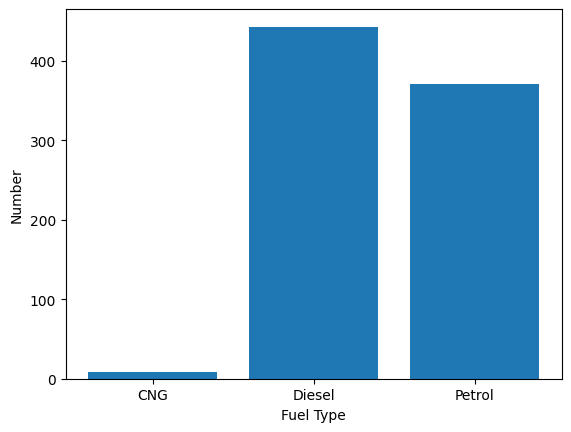

In [50]:
plt.bar(x, y)
plt.xlabel('Fuel Type')
plt.ylabel('Number')
plt.show()

In [51]:
print("Find most important features relative to Price-target")
numeric_vals = df.select_dtypes(include=['number'])
numeric_corr = numeric_vals.corr()
numeric_corr.sort_values(["Price"], inplace = True)
print(numeric_corr.Price)

Find most important features relative to Price-target
Kilometers_Driven   -0.154463
Seats                0.046168
Year                 0.227202
Engine               0.696675
Power                0.777187
Price                1.000000
Name: Price, dtype: float64


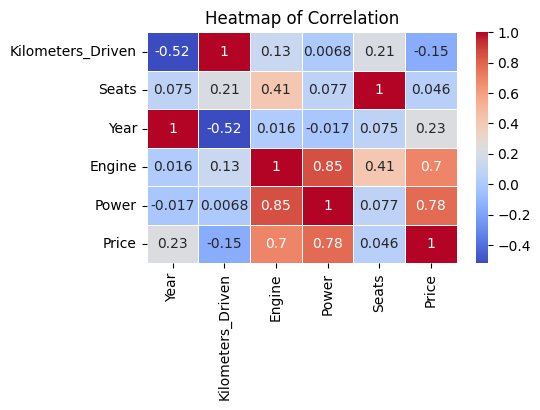

In [52]:
plt.figure(figsize=(5,  3))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Heatmap of Correlation')
plt.show()

In [53]:
df.head()

,Cars,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price
0,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5.0,4.50
1,Toyota Innova,Mumbai,2016,36000,Diesel,Automatic,First,2755,171.50,8.0,17.50
2,Maruti Ciaz,Kochi,2018,25692,Petrol,Manual,First,1462,103.25,5.0,9.95
3,Mitsubishi Pajero,Delhi,2014,110000,Diesel,Manual,First,2477,175.56,7.0,15.00
4,BMW 3,Kochi,2014,32982,Diesel,Automatic,First,1995,190.00,5.0,18.55


In [54]:
xdf = df.groupby('Cars').agg({'Price': 'mean'})
xdf.head()

,Price
Cars,
Audi A3,18.900000
Audi A4,25.380000
Audi A6,31.723333
Audi Q3,27.126000
Audi Q7,67.652500


In [55]:
ydf = df.groupby('Cars')['Price'].mean().index

In [56]:
df.groupby("Owner_Type")["Price"].mean()

Owner_Type
First     13.823033
Second    11.843818
Third      1.983333
Name: Price, dtype: float64

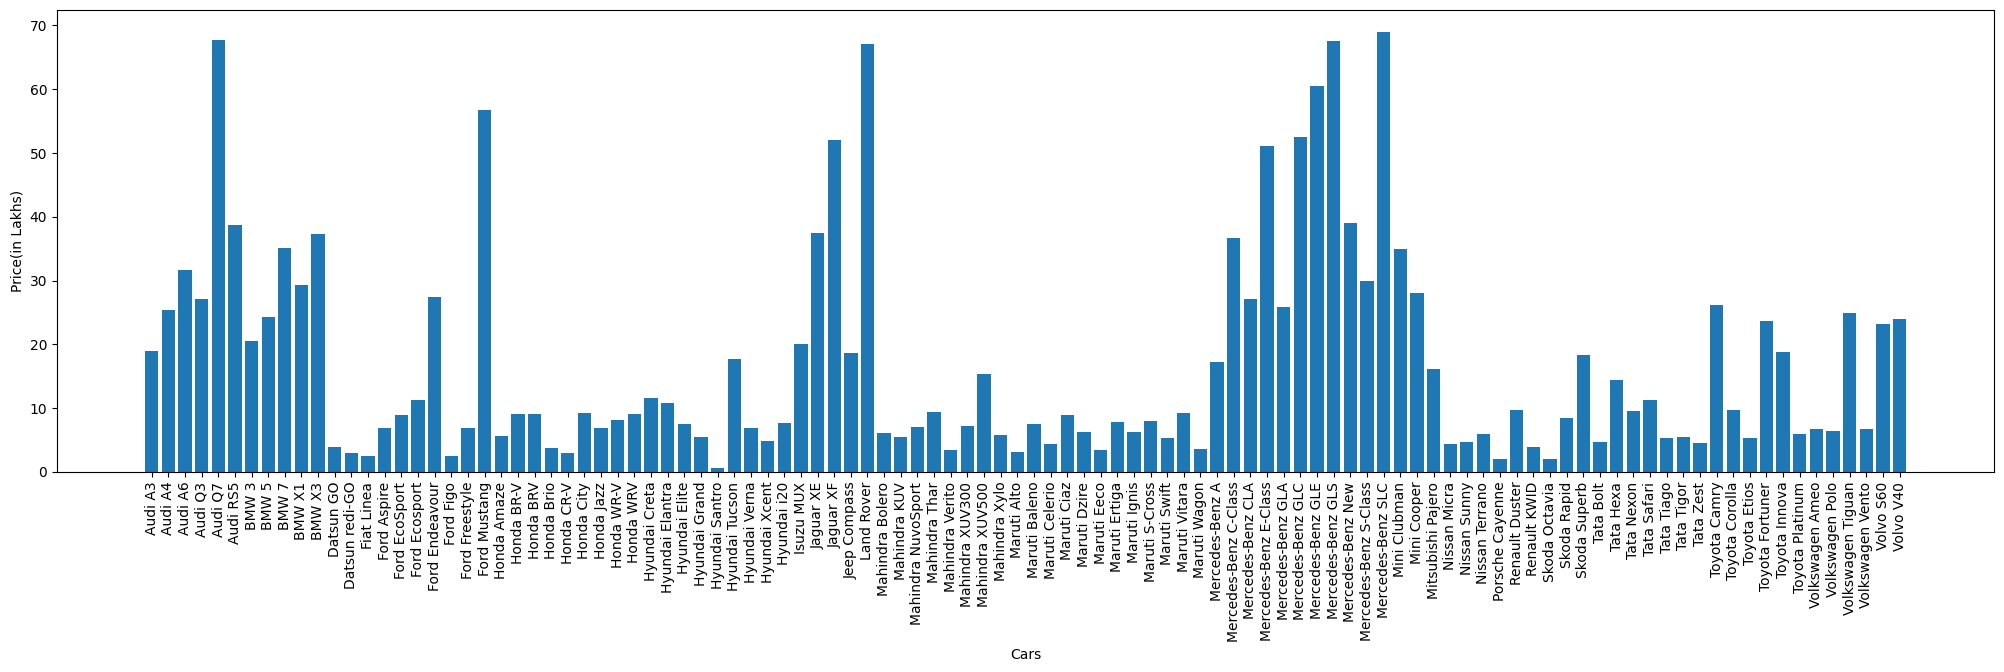

In [57]:
prod = [prod for prod, df in df.groupby('Cars')]
plt.figure(figsize=(25, 6))
plt.bar(ydf, xdf['Price']) ##
plt.xticks(prod, rotation='vertical')
plt.xlabel("Cars")
plt.ylabel("Price(in Lakhs)")
plt.show()

/tmp/ipykernel_20/1602042244.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ydf, rotation='vertical')
/tmp/ipykernel_20/1602042244.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, '5L', '10L', '15L', '20L', '25L', '30L', '35L', '40L', '45L', '50L', '55L', '60L', '65L', '70L'])


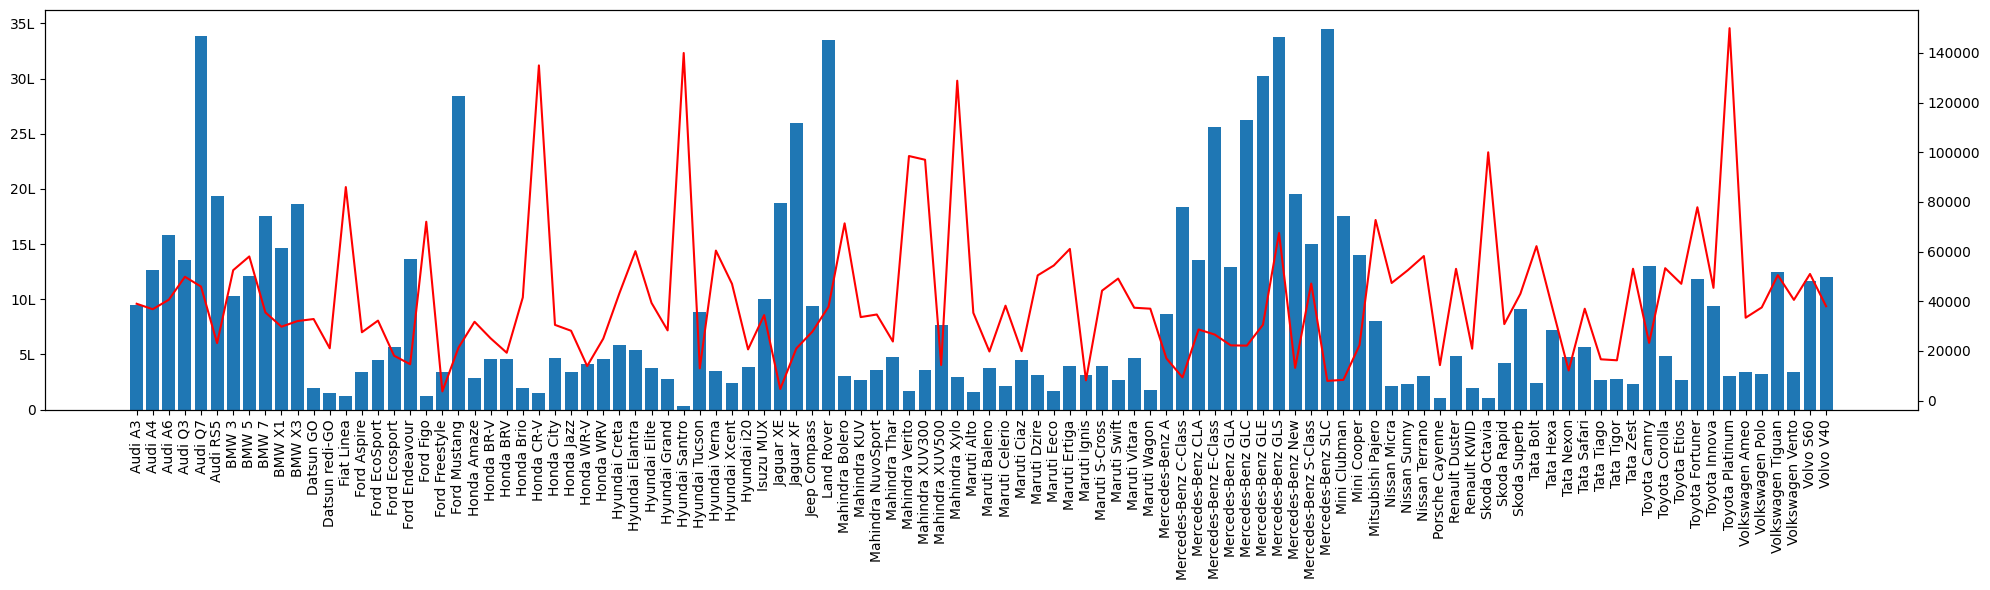

In [58]:
kilom = df.groupby('Cars').agg({'Kilometers_Driven': 'mean'})
fig, ax = plt.subplots(figsize=(20, 6))
ax1 = ax.twinx()
ax.bar(ydf, xdf['Price'])
ax1.plot(ydf, kilom, 'r-')
ax.set_xticklabels(ydf, rotation='vertical')
ax.set_yticklabels([0, '5L', '10L', '15L', '20L', '25L', '30L', '35L', '40L', '45L', '50L', '55L', '60L', '65L', '70L'])
plt.tight_layout()
plt.show()

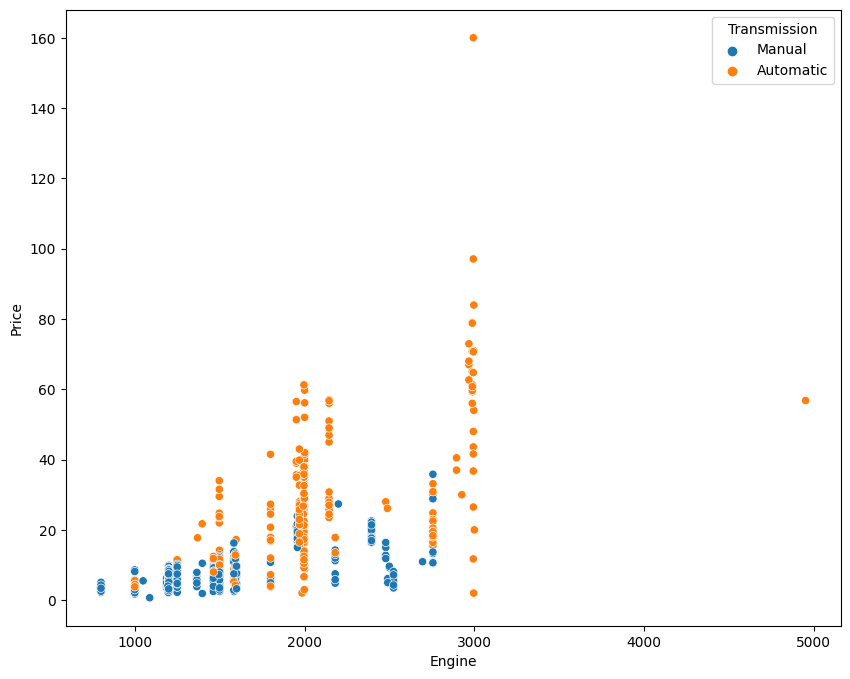

In [59]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Engine', y='Price', hue='Transmission')
plt.xlabel('Engine')
plt.ylabel('Price')
plt.show()

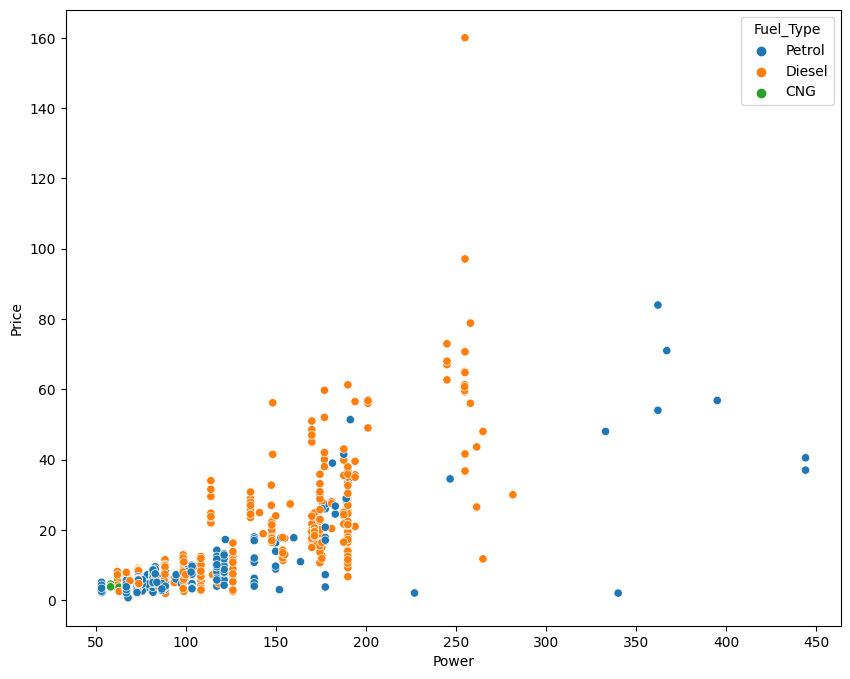

In [60]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Power', y='Price', hue='Fuel_Type')
plt.xlabel('Power')
plt.ylabel('Price')
plt.show()

## Building a Machine Learning Model

In [61]:
import copy
data_train = copy.copy(df)
data_test = copy.copy(testdf)

dfcols = np.array(df.columns[df.dtypes != object])
for i in data_train.columns:
    if i not in dfcols:
        data_train[i] = data_train[i].map(str)
        data_test[i] = data_test[i].map(str)
data_train.drop(columns = dfcols, inplace=True)
data_test.drop(columns=np.delete(dfcols, len(dfcols)-1), inplace=True)

In [62]:
#Lable Encoding the data
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

dfcols = np.array(df.columns[df.dtypes != object])
d = defaultdict(LabelEncoder)

data_train = data_train.apply(lambda x: d[x.name].fit_transform(x))
data_test = data_test.apply(lambda x: d[x.name].fit_transform(x))
data_train[dfcols] = df[dfcols]
data_test[np.delete(dfcols,len(dfcols)-1)]=testdf[np.delete(dfcols,len(dfcols)-1)]

In [63]:
data_train.head()

,Cars,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Engine,Power,Seats,Price
0,27,2,2,1,0,2011,46000,1199,88.70,5.0,4.50
1,98,9,1,0,0,2016,36000,2755,171.50,8.0,17.50
2,55,7,2,1,0,2018,25692,1462,103.25,5.0,9.95
3,77,4,1,1,0,2014,110000,2477,175.56,7.0,15.00
4,6,7,1,0,0,2014,32982,1995,190.00,5.0,18.55


In [64]:
data_test.head()

,Cars,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Engine,Power,Seats
0,67,9,1,1,0,2017,34000,2393,147.80,7.0
1,65,2,1,1,1,2014,70000,1364,67.06,5.0
2,59,9,2,0,0,2017,13500,1598,103.52,5.0
3,4,9,1,0,0,2012,66889,1995,190.00,5.0
4,59,6,2,1,0,2018,4000,1598,103.52,5.0


In [65]:
#The data which has to be trained
charac_train = ['Cars', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats']

X = data_train[charac_train].values
y = data_train['Price'].values

In [66]:
#Splitting the data into training and testing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import math
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [67]:
#Comparing accuracy of models which we could have used
regressors = [
    ['MultiLinearRegressor', LinearRegression()],
    ['DecisionTreeRegressor', DecisionTreeRegressor()],
    ['RandomForestRegressor', RandomForestRegressor()],
    ['GradientBoostingRegressor', GradientBoostingRegressor()],
    ['XGBRegressor', XGBRegressor()]
]

resultsacc1 = []
resultsacc2 = []

for model in regressors:
    name = model[0]
    mod = model[1]
    
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    
    #Errors Metrics
    mse = metrics.mean_squared_error(y_pred,y_test)
    rmse = math.sqrt(mse)
    mae = metrics.mean_absolute_error(y_pred,y_test)
    
    #Accuracy Metrics
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    acctrs = mod.score(X_train, y_train)
    acctes = mod.score(X_test, y_test)
    
    resultsacc1.append({'Model': name, 'MeanAbsoluteError': mae, 'AccuracyTraining': acctrs, 'AccuracyTesting': acctes})
    resultsacc2.append({'Model': name, 'MeanSqauredError': mse, 'RootMeanSquareError': rmse, 'MeanAbsoluteError': mae})
    
results1_df = pd.DataFrame(resultsacc1)
results2_df = pd.DataFrame(resultsacc2)


print(results1_df)
print(results2_df)


                       Model  MeanAbsoluteError  AccuracyTraining  \
0       MultiLinearRegressor           4.616490          0.695677   
1      DecisionTreeRegressor           2.686437          1.000000   
2      RandomForestRegressor           2.138508          0.965595   
3  GradientBoostingRegressor           2.167667          0.975332   
4               XGBRegressor           1.978270          0.999924   

   AccuracyTesting  
0         0.651331  
1         0.761548  
2         0.817291  
3         0.835223  
4         0.830842  
                       Model  MeanSqauredError  RootMeanSquareError  \
0       MultiLinearRegressor         59.365513             7.704902   
1      DecisionTreeRegressor         40.599634             6.371784   
2      RandomForestRegressor         31.108598             5.577508   
3  GradientBoostingRegressor         28.055514             5.296746   
4               XGBRegressor         28.801327             5.366687   

   MeanAbsoluteError  
0        

In [68]:
# The above comparision makes the inference that XGBRegressor is more accurate in training and testing.
model = XGBRegressor(n_estimators=1000)

In [69]:
#model predict
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [70]:
y_pred = model.predict(X_test)

In [71]:
#MSE, RMSE, MAE
import math
mse = metrics.mean_squared_error(y_pred,y_test)
rmse = math.sqrt(mse)
mae = metrics.mean_absolute_error(y_pred,y_test)
vals = {
    'Type of Error': ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error'],
    'Value of Error': [mse, rmse, mae]
}
pd.DataFrame(vals)

,Type of Error,Value of Error
0,Mean Squared Error,28.864980
1,Root Mean Squared Error,5.372614
2,Mean Absolute Error,1.983031


In [72]:
model.predict([[2, 2, 2003, 10000, 0, 1, 0, 2000, 100, 3]])

array([8.19505], dtype=float32)